In [1]:
import sys
sys.path.append("..")

In [2]:
import os
from getpass import getpass

import geopandas as gpd
from langchain.chat_models import ChatOpenAI
from langchain.agents import AgentType
from tools.stac.search import STACSearchTool
from tools.osmnx.geometry import OSMnxGeometryTool
from agents.l4m_agent import base_agent

In [3]:
OPENAI_API_KEY = getpass()

 ········


In [4]:
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [39]:
search_tool = STACSearchTool()
geometry_tool = OSMnxGeometryTool()

In [40]:
llm = llm = ChatOpenAI(
    temperature=0,
    openai_api_key=OPENAI_API_KEY,
    model_name="gpt-3.5-turbo"
)

In [41]:
agent = base_agent(llm, 
                   tools=[search_tool, geometry_tool], 
                   agent_type=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION)

In [42]:
r = agent("find all the hospitals in Bangalore, Karnata")



> Entering new  chain...
Thought: To find all the hospitals in Bangalore, Karnataka, I can use the "geometry" tool with the relevant tags for hospitals in OpenStreetMap.

Action:
```
{
  "action": "geometry",
  "action_input": {
    "place": "Bangalore",
    "tags": {
      "amenity": "hospital"
    }
  }
}
```
Observation:                                  name  \
0       R V Dental College & Hospital   
1           Chinmaya Mission Hospital   
2                  KLE Dental College   
3                       Health Centre   
4                K C General Hospital   
..                                ...   
95            BBMP Maternity Hospital   
96                 Ramakrishna Clinic   
97                       ESI Hospital   
98                    Apollo Hospital   
99  Panacea Hospitals Private Limited   

                                             geometry  
0   POLYGON ((77.58435 12.91216, 77.58563 12.91212...  
1   POLYGON ((77.64580 12.97844, 77.64581 12.97838...  
2   POLYGON

In [46]:
r.plot()

AttributeError: 'dict' object has no attribute 'plot'

In [36]:
df = gpd.GeoDataFrame.from_features(r["output"].to_dict(), crs="epsg:4326")

<Axes: >

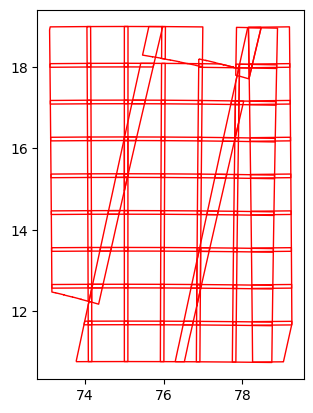

In [37]:
df.plot(edgecolor="red", facecolor="none")